In [10]:
import pandas as pd
import matplotlib as mpl

In [11]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

In [12]:
series = pd.read_csv('./data/sales-of-shampoo-over-a-three-ye.csv', 
                     header=0, parse_dates=[0],
                    index_col=0, squeeze=True, date_parser=parser)

In [13]:
print(series.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


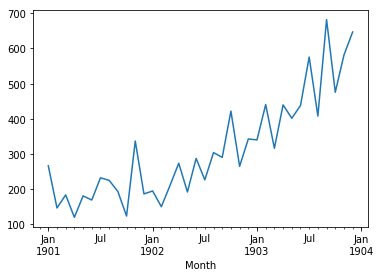

In [16]:
series.plot()
mpl.pyplot.show() 

In [20]:
from pandas.plotting import autocorrelation_plot

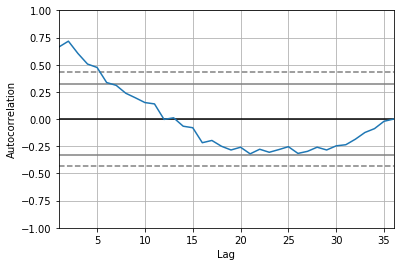

In [21]:
autocorrelation_plot(series)
mpl.pyplot.show()

In [22]:
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Thu, 07 Feb 2019   AIC                            406.340
Time:                                                 13:08:36   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


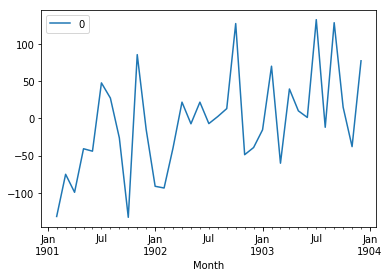

In [24]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
mpl.pyplot.show()

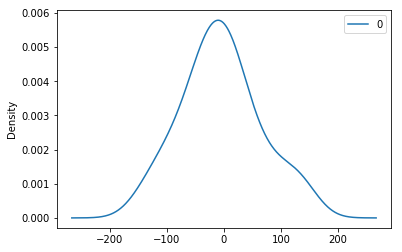

In [25]:
residuals.plot(kind='kde')
mpl.pyplot.show()

In [26]:
print(residuals.describe())

                0
count   35.000000
mean    -5.495255
std     68.132879
min   -133.296622
25%    -42.477941
50%     -7.186679
75%     24.748316
max    133.237969


In [28]:
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted = [349.11765522], expected = 342.3
predicted = [306.51298964], expected = 339.7
predicted = [387.3764463], expected = 440.4
predicted = [348.15415485], expected = 315.9
predicted = [386.30881738], expected = 439.3
predicted = [356.08203769], expected = 401.3
predicted = [446.37948879], expected = 437.4
predicted = [394.73729232], expected = 575.5
predicted = [434.91546373], expected = 407.6
predicted = [507.92341132], expected = 682.0
predicted = [435.48283877], expected = 475.3
predicted = [652.74377304], expected = 581.3
predicted = [546.34345623], expected = 646.9
Test MSE: 6958.325684908224


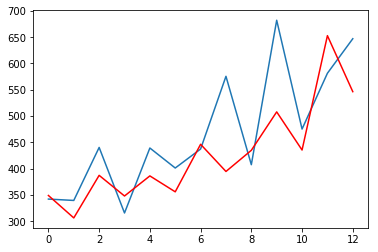

In [31]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted = {yhat}, expected = {obs}')
error = mean_squared_error(test, predictions)
print(f'Test MSE: {error}')
mpl.pyplot.plot(test)
mpl.pyplot.plot(predictions, color='red')
mpl.pyplot.show()